<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/W2025/Assignments/A1/SYSC4415_W25_A1.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Setup for local Running if you are not using Google Colab

Install [Anaconda distribution] (https://docs.anaconda.com/anaconda/install/)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn/sklearn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **waterqmark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.

To make sure you have all of the packages you need, install them with `conda`:

```
conda create -n SYSC4415_tutorials python=3.11
conda activate SYSC4415_tutorials

conda install jupyter
conda install numpy pandas scikit-learn matplotlib seaborn graphviz statsmodels
conda install -c conda-forge watermark

```

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

## NOTE about Signature in Google Colab:

Use `!pip install watermark` in Google Colab if you have errors while signing your notebook. If you work locally and follow the instructions above in the correct order, it should be already installed.

## General Instructions:

Please print out values when asked using Python's print() function with f-strings where possible.

Submit your saved notebook with all the outputs to Brightspace, but make sure that it will produce correct outputs upon restarting and click "runtime" → "run all" with clean outputs. Ensure your notebook displays all answers when this is clicked.

## Your Submission MUST contain your signature at the bottom.


In [7]:
# Name: Juan Pablo Arango
# Student Number:101210748

In [6]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz

## Section 1: Gradients (4 marks)
Hint: use attached PDF if you get lost.

In [8]:
"""
Q1a (1 mark)
- Manually derive and calculate the gradient of the function: f(x,y,z) = e^(x²) + y^y + e^(xy) + zcos(x) at point (0,1, 1)
- Show each component of the gradient.

Print your answer using print() function showing all three partial derivatives.
"""

#
print("∂f/∂x =", -1)
print("∂f/∂y =", 2)
print("∂f/∂z =", 1)

∂f/∂x = -1
∂f/∂y = 2
∂f/∂z = 1


\begin{equation}
\frac{\partial f}{\partial x} = \frac{\partial }{\partial x}[e^{x^{2}} + y^y + e^{xy} + zcos(x)]|_{(0,-1,1)} = [2xe^{x^2}+ye^{xy}-zsin(x)]_{(0,-1,1)}
\end{equation}
\begin{equation}
[2xe^{x^2}+ye^{xy}-zsin(x)]_{(0,-1,1)}  = 0+-1*1-1*0 = -1
\end{equation}
\begin{equation}
\frac{\partial f}{\partial y} = \frac{\partial }{\partial y}[e^{x^{2}} + y^y + e^{xy} + zcos(x)]|_{(0,-1,1)} =[y^y(\ln(y)+1)+e^{xy}+yxe^{xy}]_{(0,1,1)}
\end{equation}
\begin{equation}
\frac{\partial f}{\partial y} = 1^1(0+1)+e^{0(1)}+1(0)e^{0(1)} = 1+1 = 2
\end{equation}
\begin{equation}
[y^y(\ln(y)+1)+e^{xy}+yxe^{xy}]_{(0,-1,1)} = undefined
\end{equation}
\begin{equation}
\frac{\partial f}{\partial z} = \frac{\partial }{\partial z}[e^{x^{2}} + y^y + e^{xy} + zcos(x)]|_{(0,-1,1)} =[cos(x)]_{(0,-1,1)} = 1
\end{equation}

In [9]:
"""
Q1b (1 mark)
For each component of the gradient calculated in Q1a:
- Explain what the value means geometrically(1)
- Provide a conclusion about each term and gradient in general
"""

# YOUR ANSWER HERE
'''
(1) The value for our gradient means that at the given point (0,-1,1) the rate of change for x is -1, for y is undefined, and for z is 1.
For x this means that at the direction at point  f is decreasing by 1 unit per 1 unit increase of x. If we move towards x + direction from this point we will decrease essentially.
For y being undefined it means we have an asymptote or discontinuity at -1.
For z being 1 for gradient at the point means at that point f is increasing by 1 unit for unit increase in z. If we move towards the z+ direction we will increase.
'''


'\n(1) The value for our gradient means that at the given point (0,-1,1) the rate of change for x is -1, for y is undefined, and for z is 1.\nFor x this means that at the direction at point  f is decreasing by 1 unit per 1 unit increase of x. If we move towards x + direction from this point we will decrease essentially.\nFor y being undefined it means we have an asymptote or discontinuity at -1.\nFor z being 1 for gradient at the point means at that point f is increasing by 1 unit for unit increase in z. If we move towards the z+ direction we will increase.\n'

In [10]:
"""
Q1c (2 marks)
Write a Python function to verify your gradient calculation numerically:
1. Implement the function f(x,y,z)
2. Calculate numerical approximations of partial derivatives using small perturbations
3. Compare your analytical results from Q1a with numerical approximations
4. Report the result of function evaluation at the point (0,1,-1)
"""
# YOUR ANSWER HERE
import numpy as np
#1
def f(x, y, z):
    return np.exp(x**2) + y**y + np.exp(x*y) + z*np.cos(x)
print(f(0,-1,1))
# 2
def numerical_gradient(x, y, z, h=1e-5):
    grad_x = (f(x+h, y, z) - f(x, y, z)) / h
    grad_y = (f(x, y+h, z) - f(x, y, z)) / h
    grad_z = (f(x, y, z+h) - f(x, y, z)) / h
    return grad_x, grad_y, grad_z
print(numerical_gradient(0,1,1))

2.0
(1.0000099999629697, 1.0000100000517875, 0.9999999999621422)


## Section 2: Data Analysis (8 marks)

This section uses the Palmer Penguins dataset, which contains measurements from three penguin species.
The dataset includes physical measurements like bill length, bill depth, flipper length, and body mass. We are building a penguin classifier. First we need to assess out data.

In [11]:
"""
Q2a (1 mark)
✅ Load the Palmer Penguins dataset using Seaborn's load_dataset (provided)
- Show that it contains valid data
- Create variables for features and labels
- Perform basic statistical analysis by printing the general statistics table as in Tutorials.
- Find missing values and drop records with missing values for any feature
- Save entries with missing values for "sex" in a separate variable, we'll use it later.
"""

# Load data
penguins = sb.load_dataset("penguins")

# YOUR ANSWER HERE
# for -> Show that it contains valid data
print(penguins.head())
# Creation of variable and labels
# Create variables for features and labels
features = penguins.drop(columns=["species"])  # Features (all columns except species)
labels = penguins["species"]
print(features.head())
print(labels.head())
# Basic Statistical Analysis
print(penguins.describe())
print(penguins.info())
# Cleaning missing values for any feature
# Find missing values
print(penguins.isnull().sum())  # Shows missing values per column
penguins_clean = penguins.dropna(
    subset=[
      'species',
      'island',
      'bill_length_mm',
      'bill_depth_mm',
      'flipper_length_mm',
      'body_mass_g',
])
# Save entries with missing values for "sex" in a separate variable
penguins_missing_sex = penguins_clean.loc[penguins["sex"].isnull()]
penguins_with_sex = penguins_clean.loc[(penguins_clean['sex'].notnull())]
# Drop records with missing values for any feature
#penguins_cleaned = penguins.dropna()
#print(penguins_cleaned.head())
# Display cleaned dataset info
#print(penguins_cleaned.info())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
      island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Torgersen            39.1           18.7              181.0       3750.0   
1  Torgersen            39.5           17.4              186.0       3800.0   
2  Torgersen            40.3           18.0              195.0       3250.0   
3  Torgersen             NaN            NaN                NaN          NaN   
4  Torgers

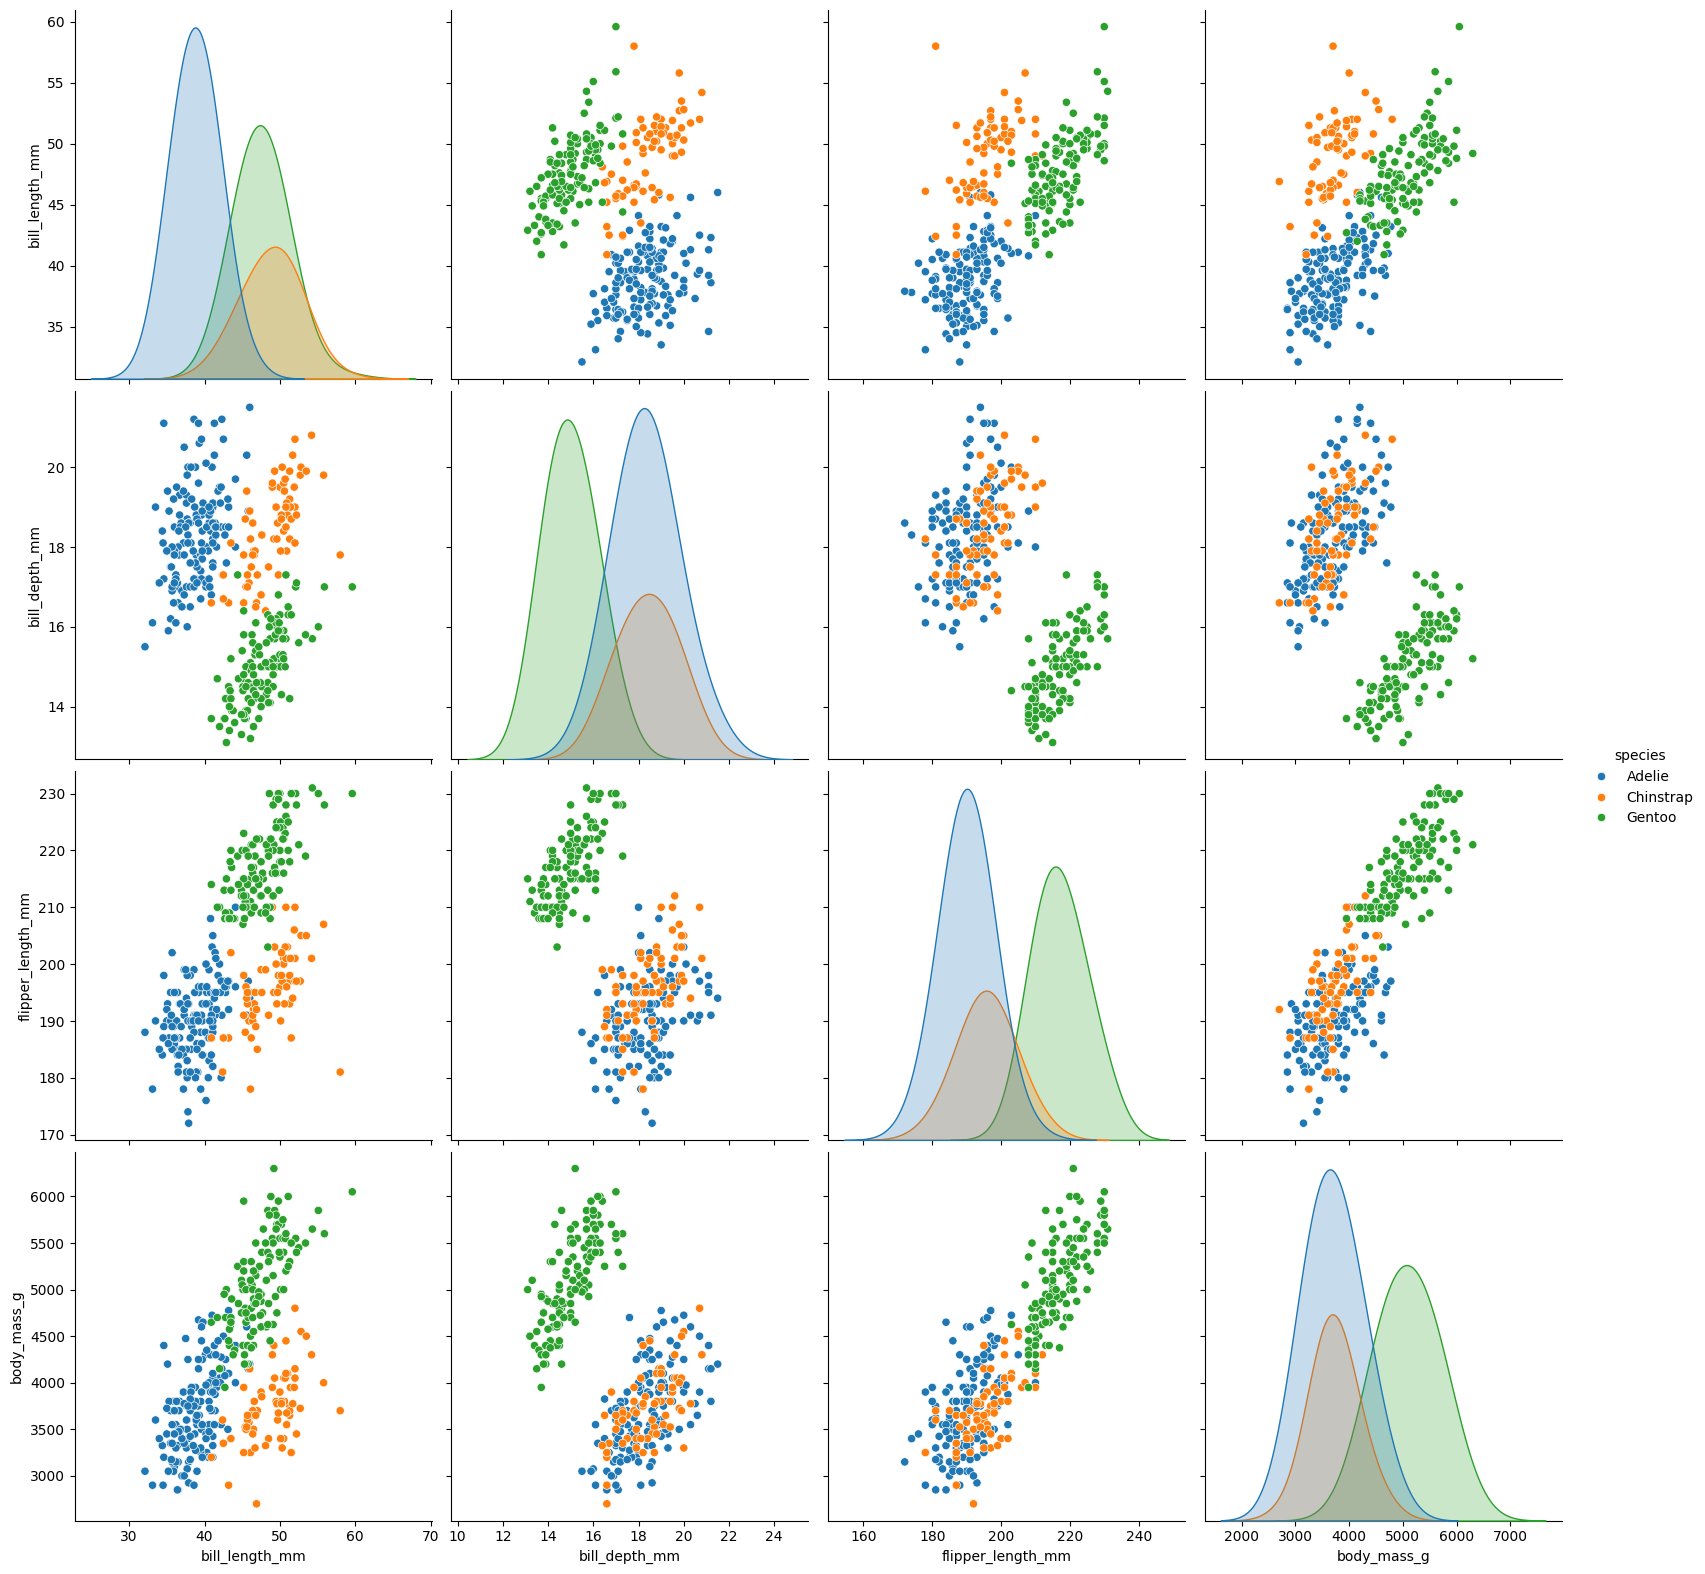

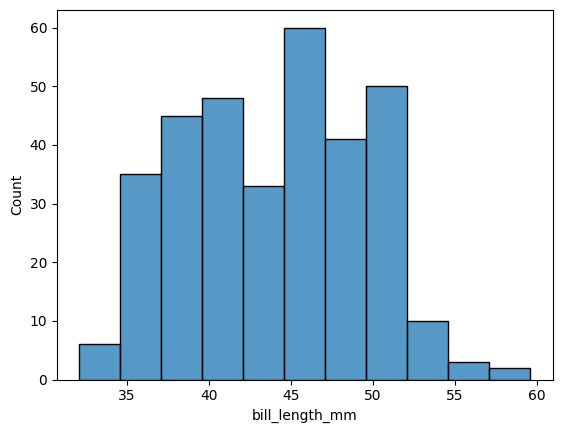

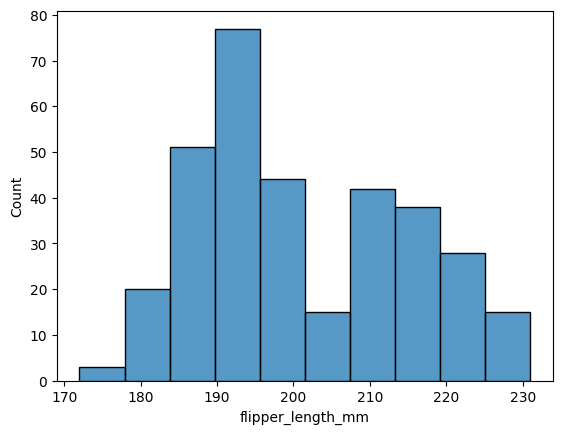

In [12]:
"""
Q2b (2 marks)
Create visualizations showing:
- Create scatterplot matrix for visual assessment of data
- Identify one feature with outliers and show distribution values for two classes (2 histograms).
"""

# YOUR ANSWER HERE
import seaborn as sns
import matplotlib.pyplot as plt

# YOUR ANSWER HERE
sb.pairplot(penguins_with_sex, hue='species', diag_kws={'bw_method': 0.9}, height=4)
plt.show()

# Show outliers for bill length and flipper length
sb.histplot(data=penguins_with_sex, x='bill_length_mm')
plt.show()

sb.histplot(data=penguins_with_sex, x='flipper_length_mm')

plt.show()


Class Distribution:
 species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

Class Proportions:
 species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: count, dtype: float64


<ipython-input-13-4d5c68171b6d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


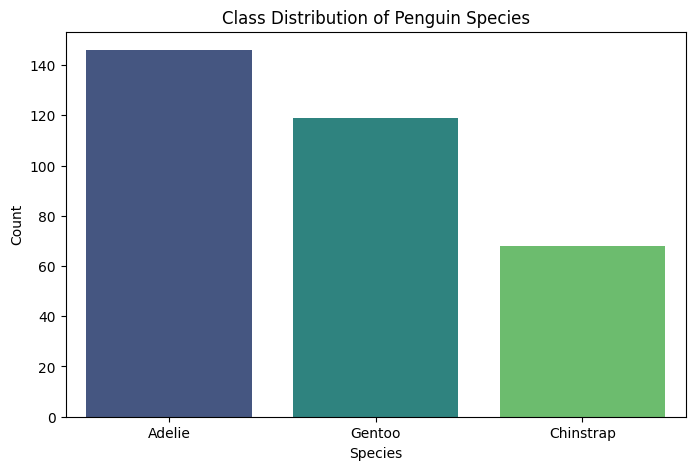

Imbalance Ratio: 2.15
Mild Class Imbalance Present.


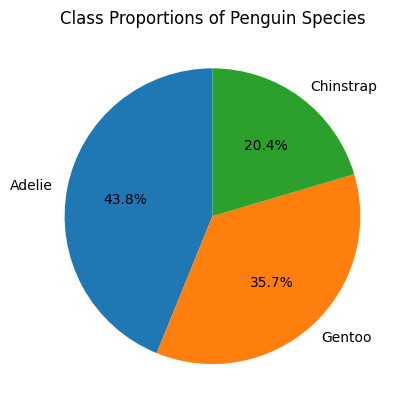

In [13]:
"""
Q2c (1 mark)
Analyze class distribution and discuss implications for model training:
- Calculate and visualize class proportions
- Identify any class imbalance
"""

# YOUR ANSWER HERE
# Calculate class distribution
class_counts = penguins_with_sex["species"].value_counts()
class_proportions = class_counts / class_counts.sum()  # Normalize to get proportions

# Print class distribution
print("Class Distribution:\n", class_counts)
print("\nClass Proportions:\n", class_proportions)

# Visualize class proportions
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution of Penguin Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

plt.pie(class_proportions, labels=class_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title("Class Proportions of Penguin Species")

imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

if imbalance_ratio > 3:
    print("Severe Class Imbalance Detected!")
elif imbalance_ratio > 1.5:
    print("Mild Class Imbalance Present.")
else:
    print("Dataset is Balanced.")


## Section 3: Model Development (8 marks)
After polishing thedata, let's make our classification model.

Training Data

Gentoo: [  40.9   13.7  214.  4650. ]
Adelie: [  37.3   17.8  191.  3350. ]
Gentoo: [  50.    15.9  224.  5350. ]
Adelie: [  35.9   19.2  189.  3800. ]
Adelie: [  40.5   18.9  180.  3950. ]

Data Shape
Training data shape (rows, columns): (266, 4)
Testing data shape (rows, columns): (67, 4)
[[96, 115, 55], ['Gentoo', 'Adelie', 'Chinstrap']]
[[96, 115, 55], ['Gentoo', 'Adelie', 'Chinstrap']]


Text(0.5, 1.0, 'Testing Data Species Split')

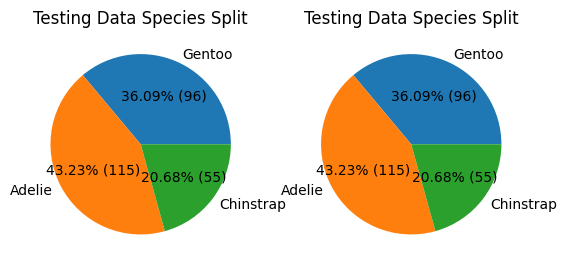

In [14]:
"""
Q3a (2 marks)
Preprocess the data:
- Use the clean dataset from Q2a (with missing values removed)
- Split into training (80%) and test (20%) sets using random_state=42
- Print first 5 rows of training data with their species labels
- Print shapes of both datasets
- Show number of samples per species in each split
"""

# YOUR ANSWER HERE
'Splitting into training and test'
from sklearn.model_selection import train_test_split
from collections import Counter
features = penguins_with_sex[[
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g',
]].values
labels = penguins_with_sex['species'].values

(X_train,X_test,y_train,y_test) = train_test_split(features,labels, test_size=0.2, random_state=42)
#

# Split dataset into train (80%) and test (20%) sets
#train_data, test_data = train_test_split(penguins_cleaned, test_size=0.2, stratify=penguins_cleaned["species"], random_state=42)
# print first 5 rows
print("Training Data\n")
for i in range(5):
  print(f"{y_train[i]:<6}: {X_train[i]}")

print("\nData Shape")
print(f"Training data shape (rows, columns): {X_train.shape}")
print(f"Testing data shape (rows, columns): {X_test.shape}")

types_count = Counter()
for stuff in y_train:
  types_count[stuff] += 1

feature_train = list(types_count.values())
labels_train = list(types_count.keys())

types_count2 = Counter()
for stuff in y_test:
  types_count2[stuff] += 1

feature_test = list(types_count.values())
labels_test= list(types_count.keys())

print([feature_test,labels_test])
print([feature_train,labels_train])

plt.subplot(1, 2, 1)
plt.pie(feature_test, labels=labels_test, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100) * sum(feature_test)))
plt.title("Testing Data Species Split")

plt.subplot(1, 2, 2)
plt.pie(feature_train, labels=labels_train, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, (p/100) * sum(feature_train)))
plt.title("Testing Data Species Split")


Training Accuracy: 1.0000
Test Accuracy: 1.0000
Cross-validation Mean: 0.9553
Cross-validation Std Dev: 0.0401


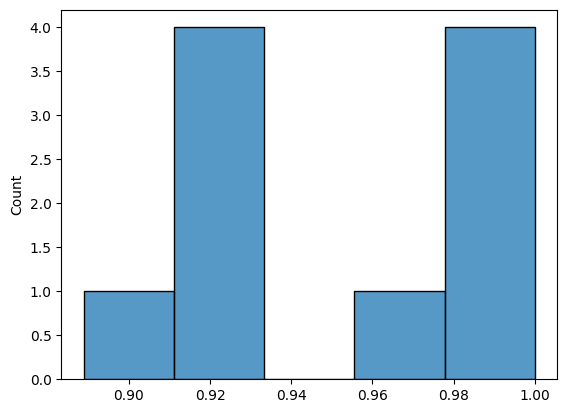

In [15]:
"""
Q3b (3 marks)
Train and evaluate a Decision Tree:
1. Create a Decision Tree with default parameters (random_state=42)
2. Evaluate the model:
   - Fit on training data
   - Print training and test accuracy score for this tree
   - Perform 10-fold cross-validation
   - Print mean and std of cross-validation scores and build cv_scores histogram.
   - What does the histogram show?
"""

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Create a Decision Tree with default parameters
clf = DecisionTreeClassifier(random_state=42)

# Prepare training and testing features/labels
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
cv = cross_val_score(clf, X_train, y_train, cv=10)
cv_scores = cross_val_score(clf, X_train, y_train, cv=10,)
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")
print(f"Cross-validation Mean: {np.mean(cv_scores):.4f}")
print(f"Cross-validation Std Dev: {np.std(cv_scores):.4f}")
sb.histplot(cv_scores)
plt.show()

# 2. Evaluate the model



Best Parameters: {'max_depth': 6, 'max_features': 7}
Best Score: 0.9552706552706554


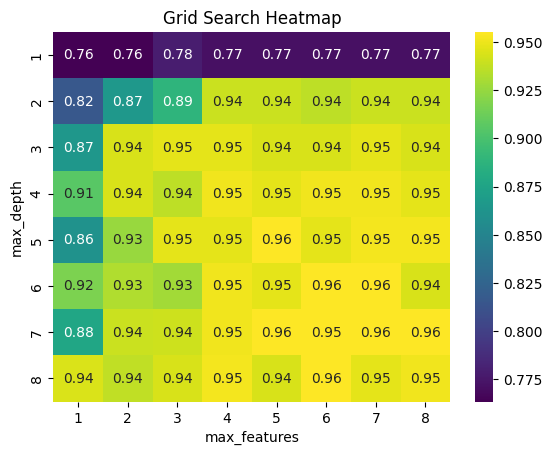

In [16]:
"""
Q3c (3 marks)
Analyze the best model from grid search:
- Initialize parameter_grid, cross_validation using StratifiedKFold
- Identify the best parameters for the tree and show the grid heatmap (don't forget labels)
- Plot the best tree structure using graphviz, use max_depth=2 (for better display)

Note: when using export_graphviz set out_file=None and use display(graph) function call, where
graph is your variable instantiated with Source(dot_data)
Export_graphviz Documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.export_graphviz.html
"""
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source

# 1. Initialize the parameter grid for grid search
dtc = DecisionTreeClassifier()
param_grid = {
    'max_depth': list(range(1,9)),
    'max_features': list(range(1,9))# Example of varying max_depth     # Example of varying minimum samples per leaf
}

# 2. Initialize StratifiedKFold cross-validation

cross_validation = StratifiedKFold(n_splits=10)

# 3. Perform grid search with cross-validation
grid_search = GridSearchCV(dtc, param_grid, cv=cross_validation)
grid_search.fit(X_train, y_train)

# 4. Identify the best parameters and show the grid heatmap
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)
#5 Plot
grid_visualisations = grid_search.cv_results_['mean_test_score']
grid_visualisations = np.array(grid_visualisations).reshape(len(param_grid['max_depth']), len(param_grid['max_features']))
sb.heatmap(grid_visualisations, annot=True, cmap='viridis', xticklabels=param_grid['max_features'], yticklabels=param_grid['max_depth'])
plt.xticks(np.arange(len(param_grid['max_features'])) + 0.5, param_grid['max_features'])
plt.yticks(np.arange(len(param_grid['max_depth'])) + 0.5, param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.title('Grid Search Heatmap')
plt.show()



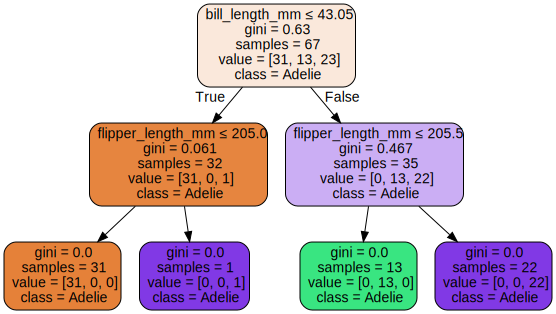

In [17]:
# First, install graphviz (if not installed)

import sklearn.tree as tree
from io import StringIO
from graphviz import Source

max_depth = grid_search.best_params_['max_depth']
max_features = grid_search.best_params_['max_features']
best_tree = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features)
best_tree.fit(X_test, y_test)

tree_data = tree.export_graphviz(best_tree, out_file=None, feature_names=[
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g',
], class_names=labels, filled=True, rounded=True, special_characters=True)
graph = Source(tree_data)
graph.render
display(graph)

## Section 4: Missing_Sex Prediction (4 marks)
In this part of the assignment, we are building a model to infer the missing values from the original dataset to fix the broken records.


In [18]:
"""
Q4a (2 marks)
Prepare data for sex prediction:
- Use the clean dataset (no missing values) from Section 2
- Convert species to numeric values.

Note: Unlike the example in the tutorial, we will use a more straightforward method, LabelEncoder().

For this task, you just need to instantiate it, use the fit_transform method on the "species" column,
and reassign or add the column.
See documentation for details:
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

- Create new feature/label split using "sex" as target
- Scale features using StandardScaler().fit_transform(features) as in Tutorial
See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Split data into training (80%) and test (20%) sets
- Train these classifiers:
  * Logistic Regression (solver='lbfgs')
  * Decision Tree (max_depth=3)
  * KNN (n_neighbors=5)
  * SVM (kernel="linear", C=0.025)
- Compare models using (Providing values for each would be enough):
  * Training and test accuracy
  * 10-fold cross-validation scores


"""
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Get a copy of data
penguins_with_sex = penguins_with_sex.copy()

# Convert species to numeric values
label_encoder = LabelEncoder()
penguins_with_sex['species'] = label_encoder.fit_transform(penguins_with_sex['species'])
#Splitting into X an Y
X = penguins_with_sex[[
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g',
    'species'
]].values
y = penguins_with_sex['sex'].values

#Scaling of data for processing
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and test sets
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y, test_size=0.2, random_state=42)


# Classifiers to be compared
classifiers = [
    LogisticRegression(solver='lbfgs'),
    DecisionTreeClassifier(max_depth=3, random_state=42),
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel="linear", C=0.025)
]

# Classifier names
classifier_names = [
    "Logistic Regression",
    "Decision Tree",
    "KNN",
    "SVM"
]

# Assuming you already have the data loaded into train_data and test_data
#
print("Training and Test Accuracy:")
for clf, name in zip(classifiers, classifier_names):
    clf.fit(Xtrain, Ytrain)
    print(f"{name}:")
    print(f"Training Accuracy: {clf.score(Xtrain, Ytrain)}")
    print(f"Test Accuracy: {clf.score(Xtest, Ytest)}")

    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(clf, Xtrain, Ytrain, cv=10)
    print(f"Cross-validation Mean: {np.mean(cv_scores)}")
    print(f"Cross-validation Std Dev: {np.std(cv_scores)}")
    print()





Training and Test Accuracy:
Logistic Regression:
Training Accuracy: 0.9097744360902256
Test Accuracy: 0.8955223880597015
Cross-validation Mean: 0.9022792022792023
Cross-validation Std Dev: 0.06949523308961568

Decision Tree:
Training Accuracy: 0.9285714285714286
Test Accuracy: 0.835820895522388
Cross-validation Mean: 0.8984330484330485
Cross-validation Std Dev: 0.06745296281374402

KNN:
Training Accuracy: 0.9511278195488722
Test Accuracy: 0.8805970149253731
Cross-validation Mean: 0.9247863247863247
Cross-validation Std Dev: 0.05795392828016275

SVM:
Training Accuracy: 0.9022556390977443
Test Accuracy: 0.8955223880597015
Cross-validation Mean: 0.9021367521367522
Cross-validation Std Dev: 0.06316198193827073



In [19]:
"""
Q4b (2 marks)
Use best model to predict missing sex:
- Make sure to create new variable for subset to work with and copy your variable with missing records into it,
using new_var = your_variable.copy().
- Print records with missing sex values from section 2.
- Remove records that have missing values other than sex using dropna: df.dropna(subset=['column_name'],inplace=True).
- Scale features using StandardScaler().fit_transform(features) as in Q3
- Create new features/labels variables for the new dataset.

- Select best classifier based on test performance from Q4a

- For each record in missing_sex dataset, using best_model.predict(features) and best_model.predict_proba(features)
- Add missing values to the clean dataset and make sure there are no missing values.
"""
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Create new var to store info
data = penguins_missing_sex.copy()
print(data.head())
# Printing records
#print(penguins_missing_sex.head())
# Remove missing values
data.dropna(subset=[
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g',
    'species'
], inplace=True)
# Convert species to numeric values
#print(data.head())
data.loc[:, 'species'] = LabelEncoder().fit_transform(penguins_missing_sex['species'])
#Splitting of data and Scaling of data
scaler = StandardScaler()
X = data[[
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g',
    'species'
]].values
X = scaler.fit_transform(X)
#Best model
best_model = classifiers[0]#SVC(kernel="linear", C=0.025)
best_model.fit(Xtrain, Ytrain)
penguins_missing_sex['sex'] = best_model.predict(X)
print(penguins_missing_sex.head())
assert penguins_missing_sex.isna().sum().sum() == 0
#Update and clean data for presentation
penguins_with_sex = pd.concat([penguins_with_sex, penguins_missing_sex])
penguins_with_sex = penguins_with_sex.dropna()
assert penguins_with_sex.isna().sum().sum() == 0




   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
8   Adelie  Torgersen            34.1           18.1              193.0   
9   Adelie  Torgersen            42.0           20.2              190.0   
10  Adelie  Torgersen            37.8           17.1              186.0   
11  Adelie  Torgersen            37.8           17.3              180.0   
47  Adelie      Dream            37.5           18.9              179.0   

    body_mass_g  sex  
8        3475.0  NaN  
9        4250.0  NaN  
10       3300.0  NaN  
11       3700.0  NaN  
47       2975.0  NaN  
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
8   Adelie  Torgersen            34.1           18.1              193.0   
9   Adelie  Torgersen            42.0           20.2              190.0   
10  Adelie  Torgersen            37.8           17.1              186.0   
11  Adelie  Torgersen            37.8           17.3              180.0   
47  Adelie      Dream            37.

<ipython-input-19-d5b2230b7a0e>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_missing_sex['sex'] = best_model.predict(X)


## Signature:
Don't forget to insert your name and student number and execute.

In [20]:
# Provide your Signarure:
!pip install watermark
%load_ext watermark
%watermark -a 'Juan Pablo Arango, 101210748' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn,graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.0 MB/s eta 0:00:00
Author: Juan Pablo Arango, 101210748

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 7.34.0

numpy     : 1.26.4
pandas    : 2.2.2
sklearn   : 1.6.1
matplotlib: 3.10.0
seaborn   : 0.13.2
graphviz  : 0.20.3

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

